# Problem Definition and Background Information

The primary objective of this project is to develop a robust prediction model that automates the loan approval process. This automation is essential for financial institutions as it enhances operational efficiency, reduces the potential for human bias, and ensures a more consistent decision-making framework. The stakeholders involved in this process include banks that provide loans, loan applicants who seek financial assistance, and regulatory bodies that enforce fair lending practices to protect consumers.

The loan approval process traditionally involves a thorough review of various factors, including the applicant's credit history, income level, employment status, and other financial indicators. However, this manual process can be time-consuming and prone to biases that may affect the fairness of the decisions made. By implementing a predictive model, we aim to standardize the evaluation criteria, thereby promoting equitable treatment of all applicants regardless of their background. 

# Data Section:

The dataset used for this analysis is `loan_approval.csv`, which has been pre-processed to remove missing values and encode categorical ariables.
 
# Exploratory Data Analysis (EDA):

We will conduct EDA to understand the distribution of the target variable and the features in the dataset, avoiding any discriminatory features of the dataset, such as race, sex, age, zip_code, city, state, country, and year, and their derivatives such as having a drivers license or being married.
 
# Classification Modeling:

We will implement three classification models: Logistic Regression, K-Nearest Neighbors (KNN), and Support Vector Machine (SVM). Each odel will undergo hyperparameter tuning to find the optimal parameters, followed by evaluation using various performance metrics.

### Tasks
 1. Load the dataset and perform EDA.
 2. Split the data into training and testing sets.
 3. Normalize the numerical features if necessary.
 4. Implement and tune Logistic Regression, KNN, and SVM models.
 5. Evaluate each model using confusion matrix, classification report, ROC curve, and AUC.



# Motivation:

The automation of loan approval decisions is crucial for financial institutions as it streamlines operations, minimizes human bias in decision-making, and ensures fair treatment of all applicants. By leveraging advanced algorithms and machine learning techniques, financial institutions can process applications more efficiently, reducing the time taken to make decisions. This not only enhances customer satisfaction but also allows banks to allocate resources more effectively. Furthermore, automated systems can analyze vast amounts of data to identify patterns and trends that may not be immediately apparent to human reviewers, leading to more informed and objective decisions. Ultimately, this approach fosters a more equitable lending environment, where applicants are evaluated based on their financial merits rather than subjective factors.

## Key Stakeholders:
- Banks providing loans
- Loan applicants seeking financial assistance
- Regulatory bodies enforcing fair lending practices

## Problem:
- Inefficiencies and biases in manual loan approval processes.

## Inputs:
- Loan application data (features such as income, credit score, employment status, etc.)

## Expected Outputs:
- Automated loan approval decisions (approved or not approved)

## Purpose:
- To improve the efficiency and fairness of the loan approval process.


# Importing Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from tkinter import filedialog

from sklearn.model_selection import train_test_split, GridSearchCV, KFold
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
from sklearn.preprocessing import StandardScaler

# Load the dataset

In [3]:
# Load the dataset from Downloads folder
file_path = filedialog.askopenfilename(title="Select the CSV file", filetypes=[("CSV files", "*.csv")])
df = pd.read_csv(file_path)

# Display the first few rows
print("First few rows of the dataset:")
print(df.head())

# Display summary statistics
print("\nSummary statistics:")
print(df.describe())

# Display basic information about the dataset
print("\nDataset information:")
print(df.info())


2024-11-14 21:17:18.114 Python[77003:17234467] +[IMKClient subclass]: chose IMKClient_Legacy
2024-11-14 21:17:19.003 Python[77003:17234467] The class 'NSOpenPanel' overrides the method identifier.  This method is implemented by class 'NSWindow'


First few rows of the dataset:
   approved  gender    age   debt  married  bank_customer  ethnicity_white  \
0         1       1  30.83  0.000        1              1                1   
1         1       0  58.67  4.460        1              1                0   
2         1       0  24.50  0.500        1              1                0   
3         1       1  27.83  1.540        1              1                1   
4         1       1  20.17  5.625        1              1                1   

   ethnicity_black  ethnicity_latino  ethnicity_asian  ethnicity_other  \
0                0                 0                0                0   
1                1                 0                0                0   
2                1                 0                0                0   
3                0                 0                0                0   
4                0                 0                0                0   

   years_employed  prior_default  employed  credit_scor

# Exploratory Data Analysis (EDA) and Visualization


Missing values in each column:
Series([], dtype: int64)


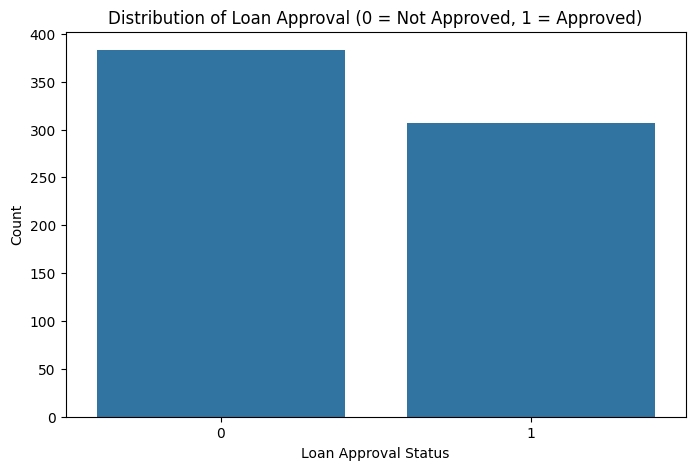

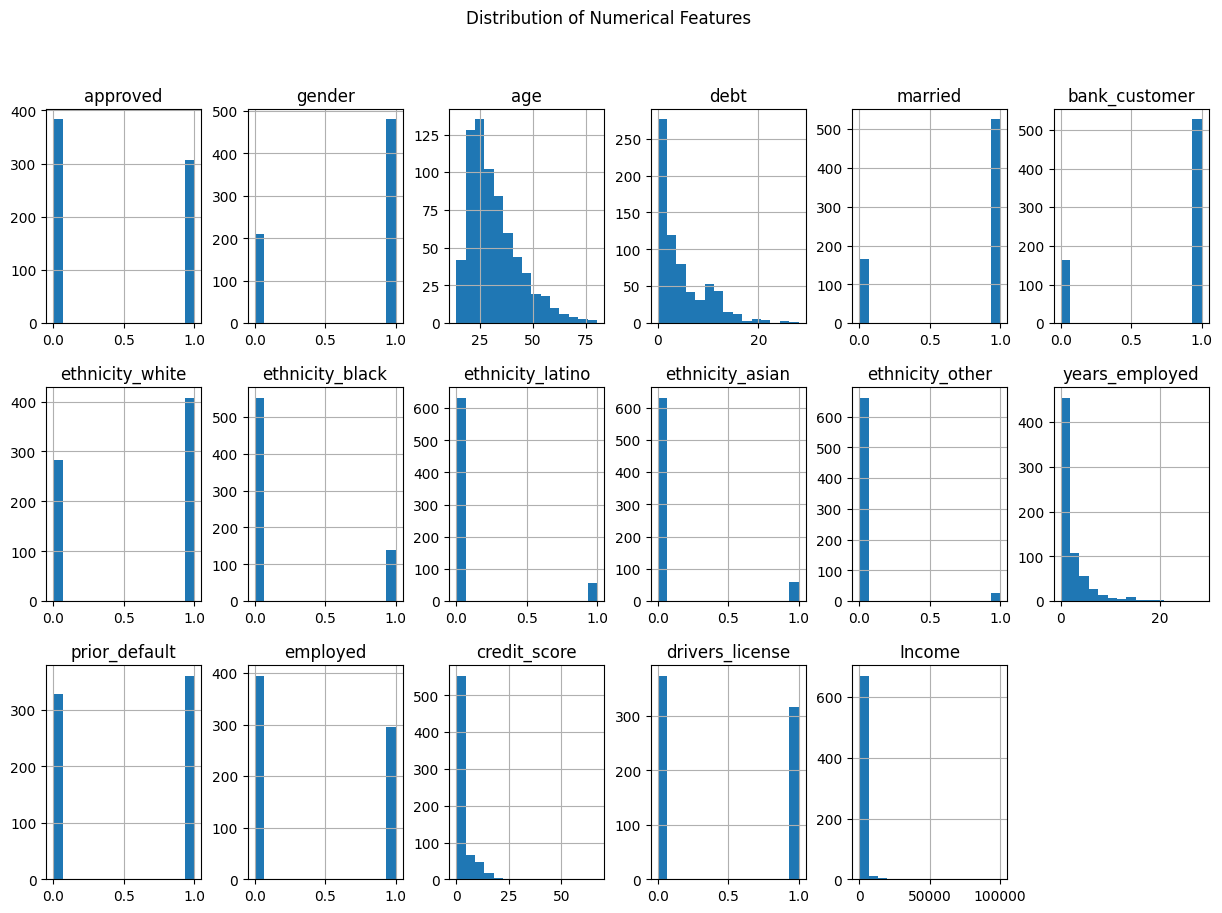

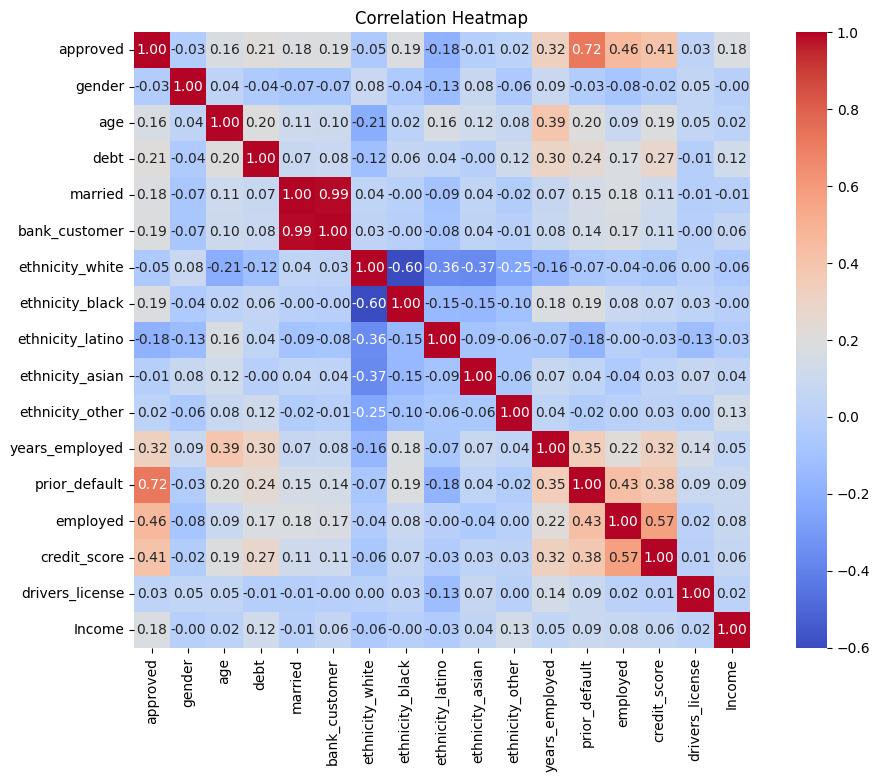

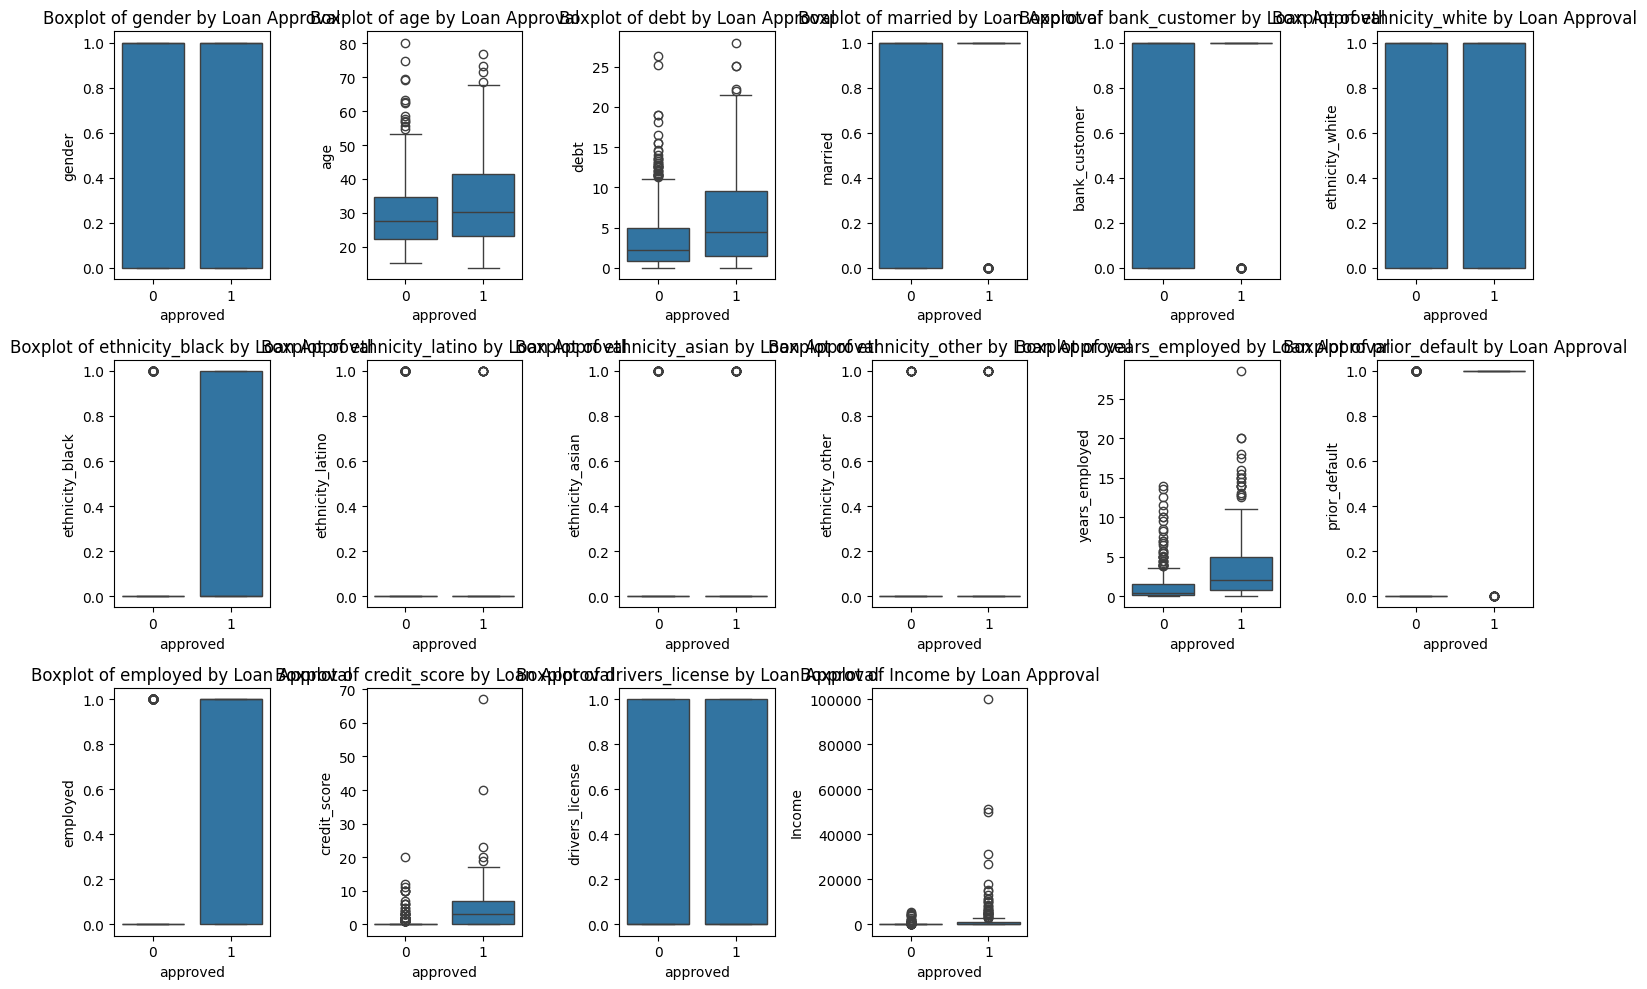

In [4]:
# Check for missing values
missing_values = df.isnull().sum()
print("\nMissing values in each column:")
print(missing_values[missing_values > 0])

# Visualize the distribution of the target variable 'approved'
plt.figure(figsize=(8, 5))
sns.countplot(x='approved', data=df)
plt.title('Distribution of Loan Approval (0 = Not Approved, 1 = Approved)')
plt.xlabel('Loan Approval Status')
plt.ylabel('Count')
plt.show()

# Visualize the distribution of numerical features
numerical_features = df.select_dtypes(include=['float64', 'int64']).columns
df[numerical_features].hist(bins=15, figsize=(15, 10), layout=(3, 6))
plt.suptitle('Distribution of Numerical Features')
plt.show()

# Correlation heatmap
plt.figure(figsize=(12, 8))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Correlation Heatmap')
plt.show()

# Boxplots for numerical features against the target variable
plt.figure(figsize=(15, 10))
for i, feature in enumerate(numerical_features[1:], 1):  # Skip 'approved' for the x-axis
    plt.subplot(3, 6, i)
    sns.boxplot(x='approved', y=feature, data=df)
    plt.title(f'Boxplot of {feature} by Loan Approval')
plt.tight_layout()
plt.show()


# Data Science on discriminatory features

I want to drop certain features that are discriminatory, and I first need to conduct hypothesis testing to see if there is a significant association between the ethnicity and the marital status and driver's license.

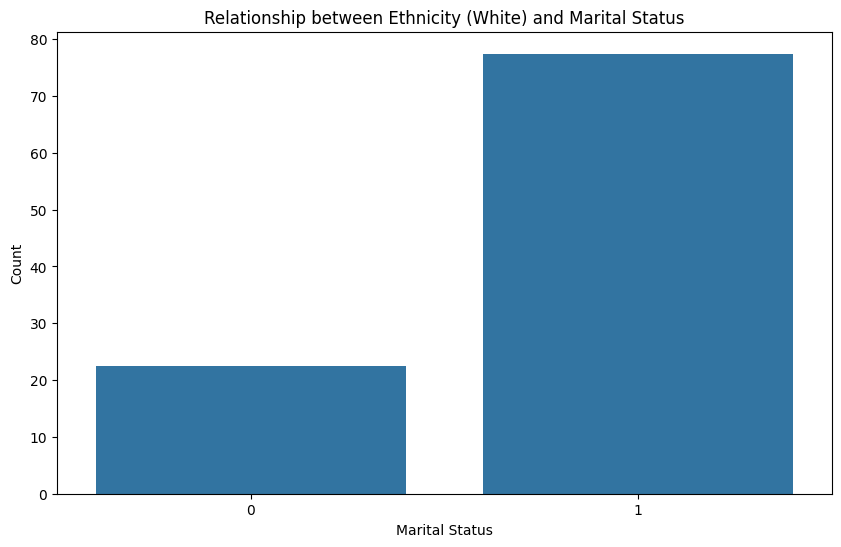

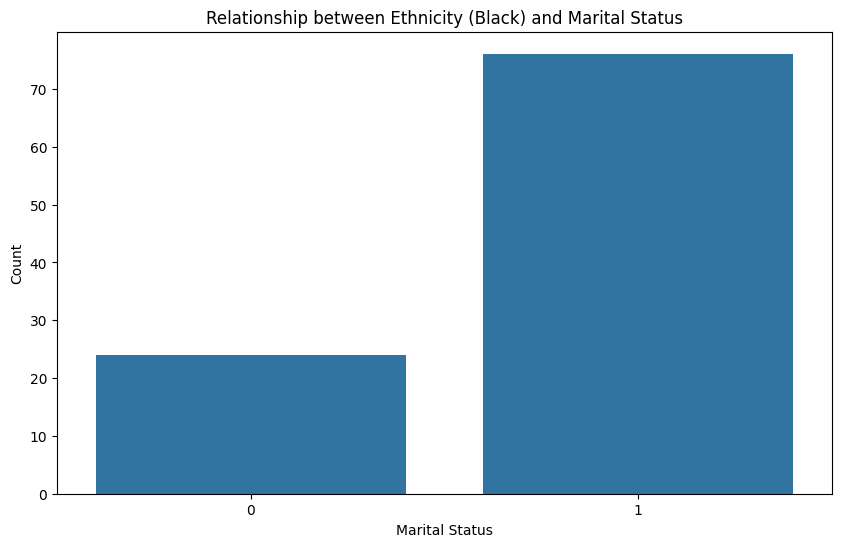

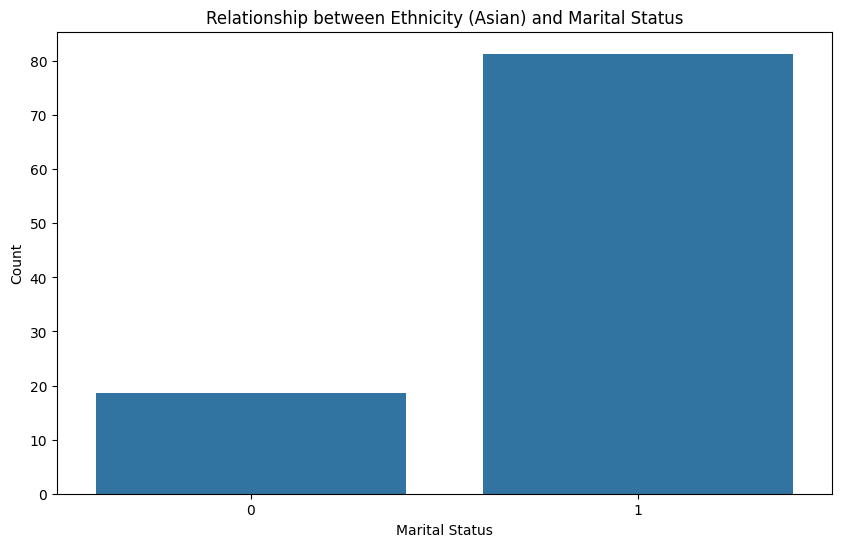

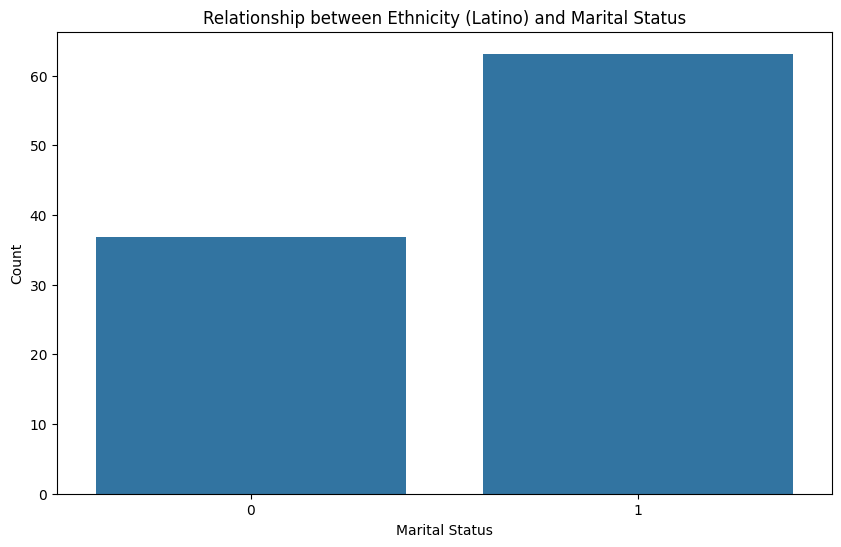

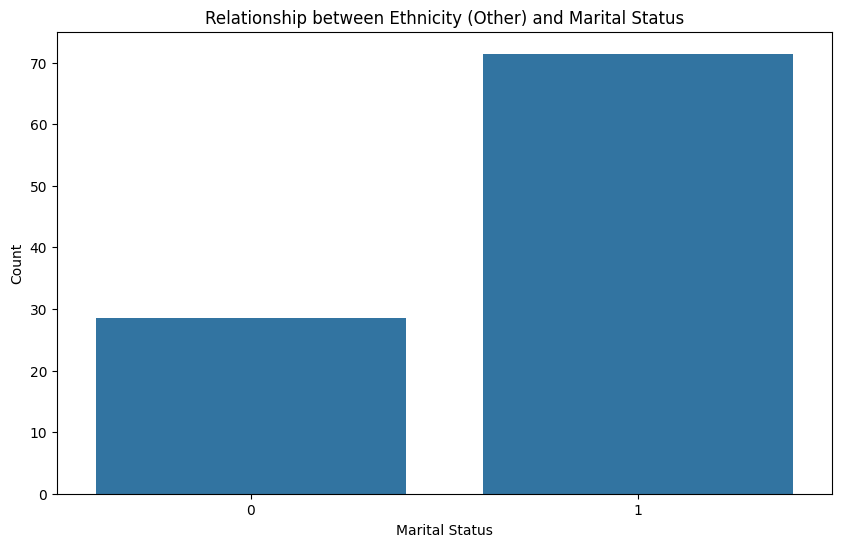

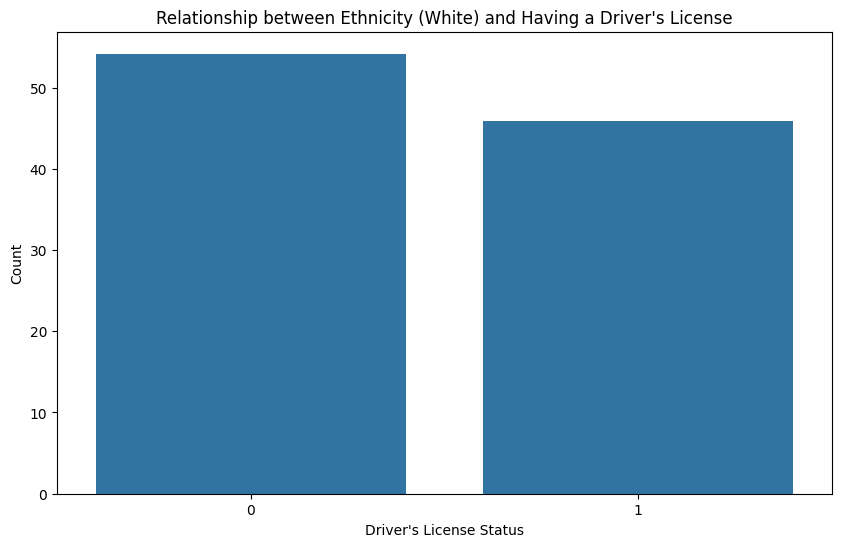

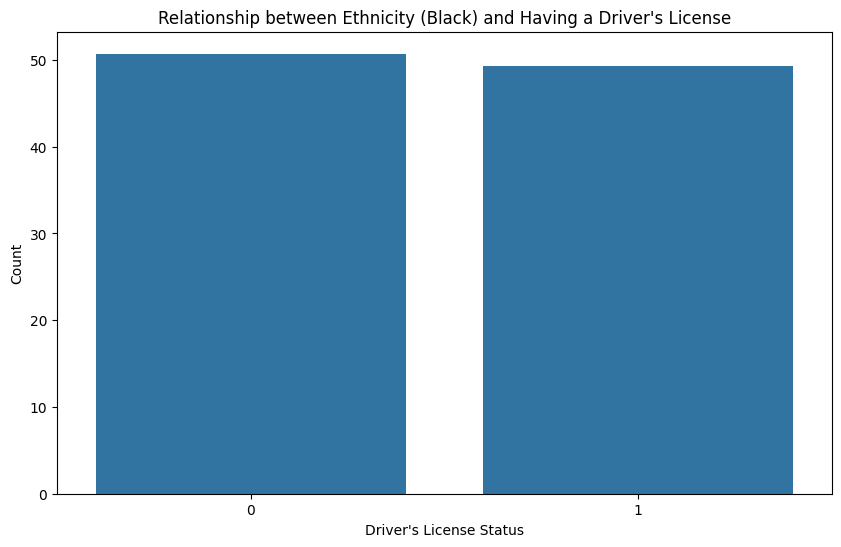

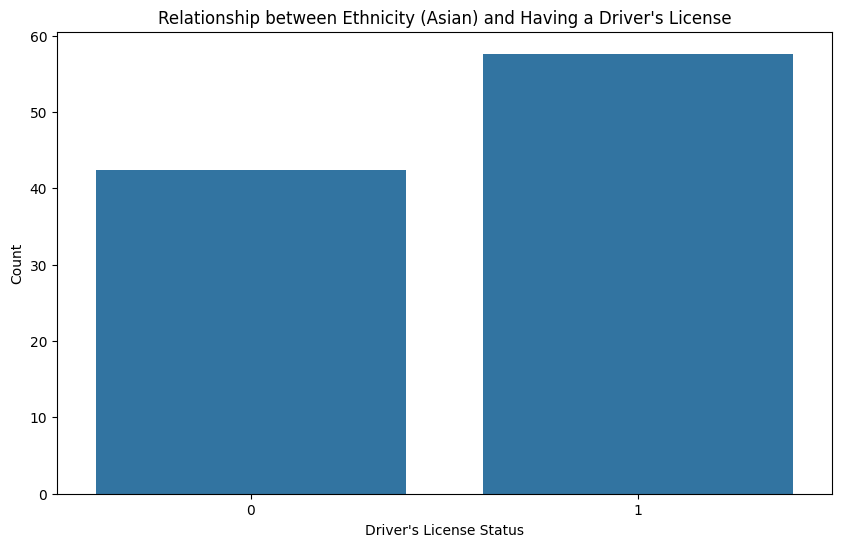

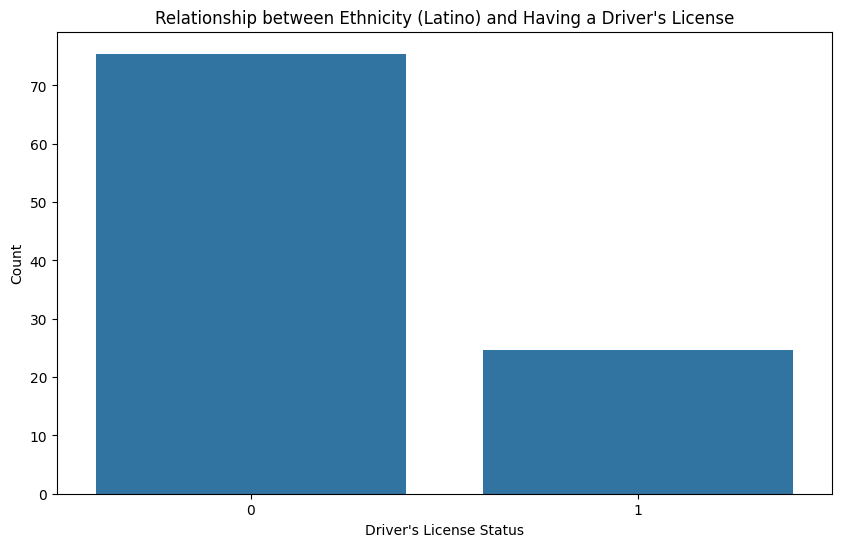

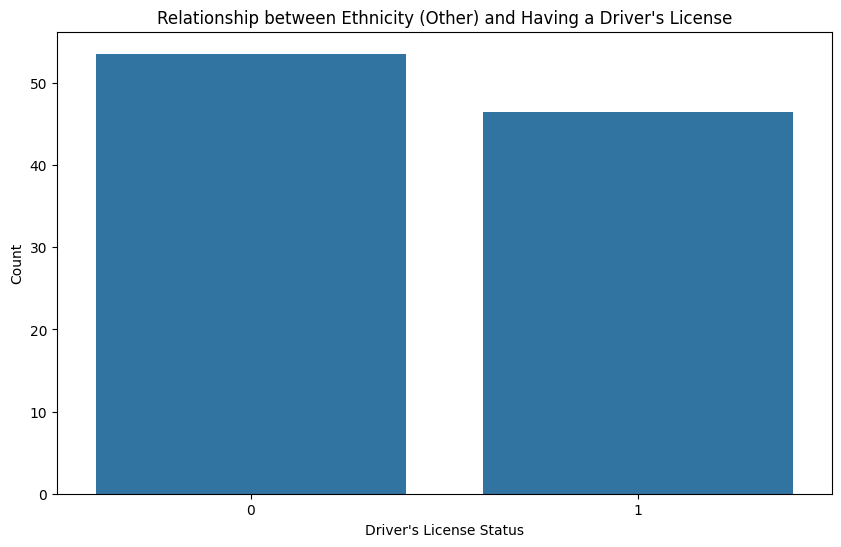

Ethnicity: white
  Marital Status - Chi2: 0.8456505426154985, p-value: 0.35778569729546295
  Driver's License - Chi2: 0.0, p-value: 1.0
Conclusion: No significant association for white.
Ethnicity: black
  Marital Status - Chi2: 0.0, p-value: 1.0
  Driver's License - Chi2: 0.6746947556352807, p-value: 0.4114195742446024
Conclusion: No significant association for black.
Ethnicity: asian
  Marital Status - Chi2: 0.6932174436002096, p-value: 0.4050721602021541
  Driver's License - Chi2: 3.1348616195332104, p-value: 0.07663488994120339
Conclusion: No significant association for asian.
Ethnicity: latino
  Marital Status - Chi2: 4.960026088487053, p-value: 0.025939815992057073
  Driver's License - Chi2: 10.374125493244344, p-value: 0.0012779366461140359
Conclusion: Drop all variables as they serve a discriminatory purpose.


In [5]:

def plot_percentage_distribution(x, hue, data, title, xlabel, ylabel):
    plt.figure(figsize=(10, 6))
    # Filter data to include only rows where the hue is 1
    filtered_data = data[data[hue] == 1]
    
    # Calculate the percentage of each category
    percentage_data = filtered_data.groupby(x).size().reset_index(name='count')
    total_counts = percentage_data['count'].sum()
    percentage_data['percentage'] = percentage_data['count'] / total_counts * 100

    # Create a bar plot for percentages
    sns.barplot(x=x, y='percentage', data=percentage_data, dodge=False)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()

# New visualizations for relationship between ethnicities and being married
ethnicities = ['white', 'black', 'asian', 'latino', 'other']
for ethnicity in ethnicities:
    plot_percentage_distribution('married', f'ethnicity_{ethnicity}', df,
                            f'Relationship between Ethnicity ({ethnicity.capitalize()}) and Marital Status',
                            'Marital Status', 'Count')

# New visualizations for relationship between ethnicities and having a drivers license
for ethnicity in ethnicities:
    plot_percentage_distribution('drivers_license', f'ethnicity_{ethnicity}', df,
                            f'Relationship between Ethnicity ({ethnicity.capitalize()}) and Having a Driver\'s License',
                            'Driver\'s License Status', 'Count')
    
import scipy.stats as stats

# Function to conduct hypothesis testing for marital status and drivers license by ethnicity
def hypothesis_testing_ethnicity(df, ethnicities):
    results = {}
    
    for ethnicity in ethnicities:
        # Create contingency tables for marital status and driver's license
        marital_table = pd.crosstab(df[f'ethnicity_{ethnicity}'], df['married'])
        license_table = pd.crosstab(df[f'ethnicity_{ethnicity}'], df['drivers_license'])
        
        # Perform Chi-squared test for marital status
        chi2_marital, p_marital, _, _ = stats.chi2_contingency(marital_table)
        
        # Perform Chi-squared test for driver's license
        chi2_license, p_license, _, _ = stats.chi2_contingency(license_table)
        
        # Store results
        results[ethnicity] = {
            'marital_status': {'chi2': chi2_marital, 'p_value': p_marital},
            'drivers_license': {'chi2': chi2_license, 'p_value': p_license}
        }
    
    return results

# Conduct hypothesis testing for each ethnicity
ethnicity_results = hypothesis_testing_ethnicity(df, ethnicities)

# Print the results
for ethnicity, result in ethnicity_results.items():
    print(f"Ethnicity: {ethnicity}")
    print(f"  Marital Status - Chi2: {result['marital_status']['chi2']}, p-value: {result['marital_status']['p_value']}")
    print(f"  Driver's License - Chi2: {result['drivers_license']['chi2']}, p-value: {result['drivers_license']['p_value']}")
    
    # Check if any p-value is significant
    if result['marital_status']['p_value'] < 0.05 or result['drivers_license']['p_value'] < 0.05:
        print(f"Conclusion: Drop all variables as they serve a discriminatory purpose.")
        break  # Exit the loop if any significant p-value is found
    else:
        print(f"Conclusion: No significant association for {ethnicity}.")

 ## The results from the Chi-squared tests indicate the relationship between ethnicity and both marital status and driver's license status.
 
 For the 'latino' ethnicity, the p-value for marital status is 0.0259, which is less than the common alpha level of 0.05. This suggests that there is a statistically significant association between being Latino and marital status, indicating that we should drop this variable from our analysis.
 
 The driver's license status for 'latino' also shows a significant p-value of 0.0013, indicating a strong association. Therefore, we should also drop this variable as it can distill the ethnicity of the person.
 
 ## For other ethnicities, the p-values are greater than 0.05, suggesting no significant association with marital status or driver's license status. 
 
 Specifically:
 - 'white': p-values of 0.3578 (marital status) and 1.0 (driver's license) indicate no significant association.
 - 'black': p-values of 1.0 (marital status) and 0.4114 (driver's license) indicate no significant association.
 - 'asian': p-values of 0.4051 (marital status) and 0.0766 (driver's license) suggest no significant association, although the driver's license is close to significance.
 - 'other': p-values of 0.7160 (marital status) and 1.0 (driver's license) indicate no significant association.
 
 ## Based on these results, we should drop both the ethnicity variables and the associated marital status and driver's license variables from our model.


# Because some of the data has discriminatory features, we will drop them from our model. 

## We will drop the following columns:
'ethnicity_...', 'gender', 'age', 'drivers_license', 'married'

In [6]:
# Drop discriminatory features from the DataFrame
df = df.drop(columns=['ethnicity_white', 'ethnicity_black', 'ethnicity_asian', 'ethnicity_latino', 'ethnicity_other', 'gender', 'age', 'drivers_license', 'married'])

# Redo EDA


Missing values in each column:
Series([], dtype: int64)


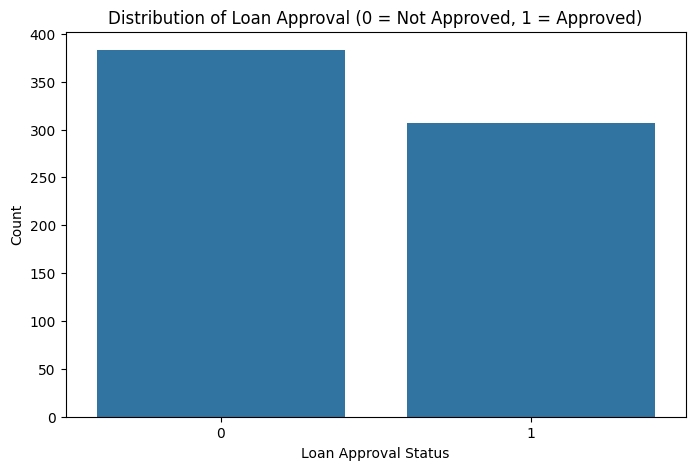

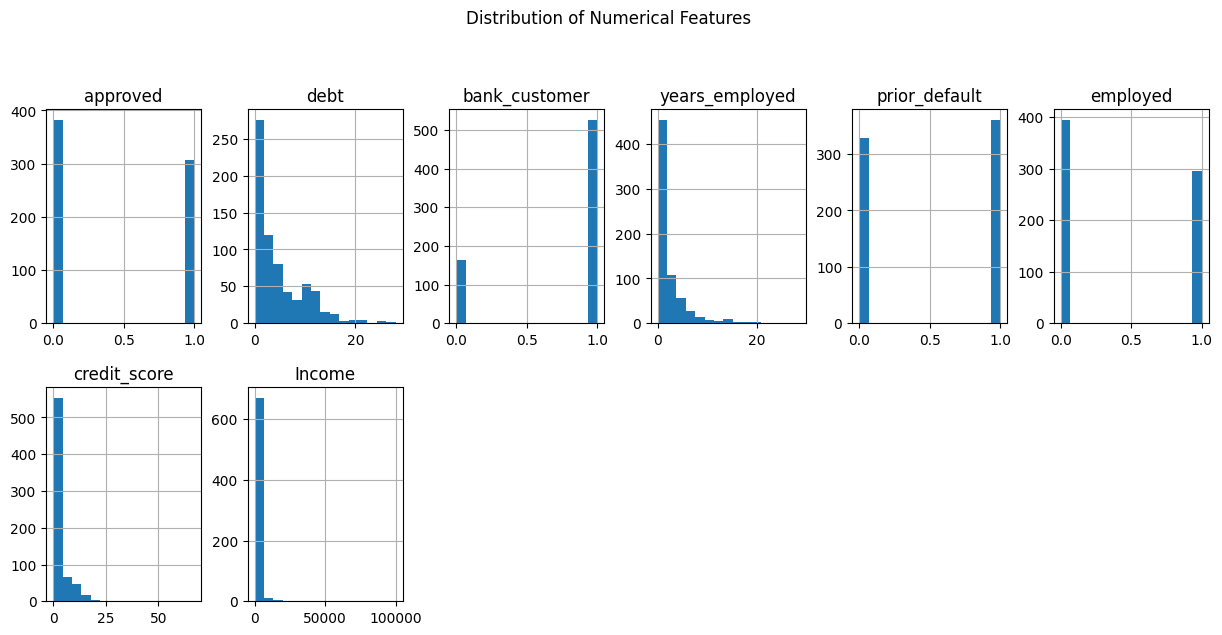

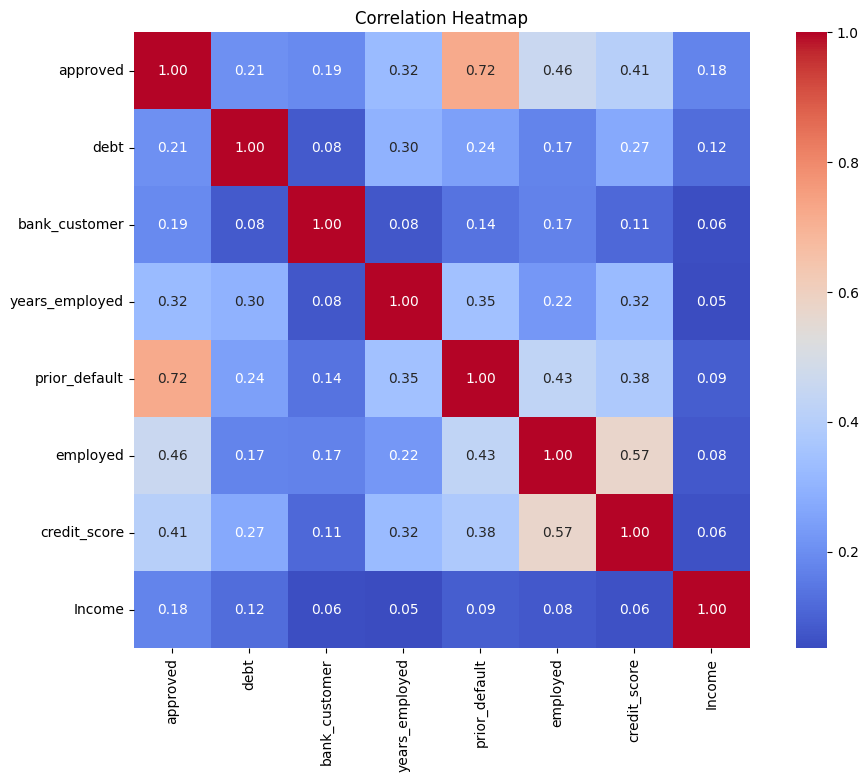

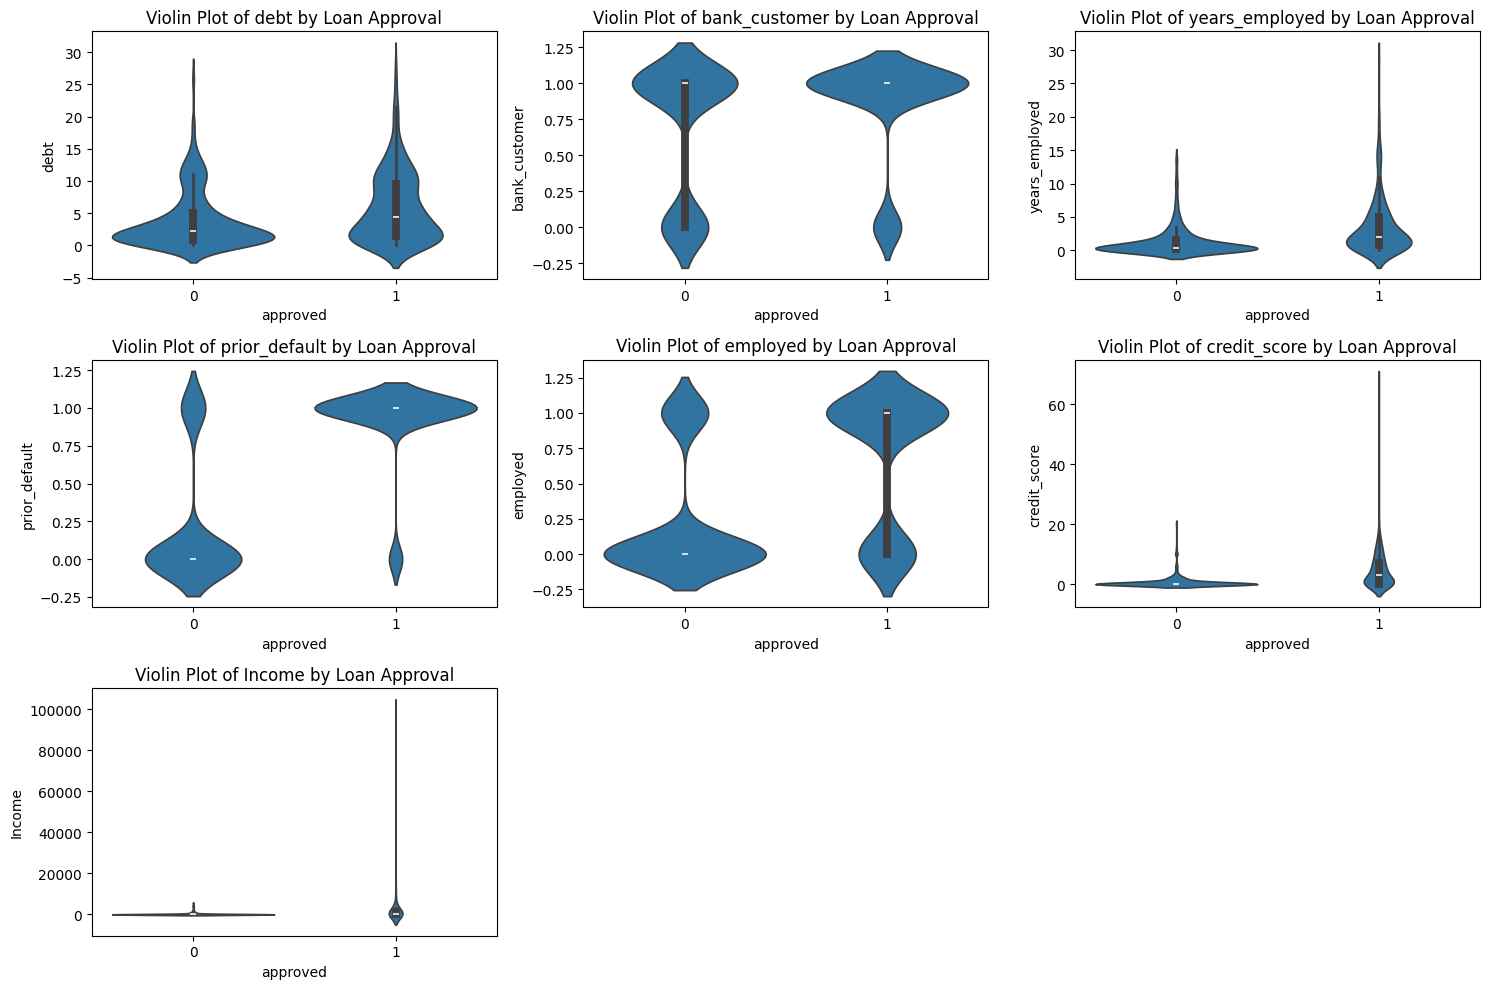

In [11]:
# Redo EDA
# Exploratory Data Analysis (EDA) and Visualization

# Check for missing values
missing_values = df.isnull().sum()
print("\nMissing values in each column:")
print(missing_values[missing_values > 0])

# Visualize the distribution of the target variable 'approved'
plt.figure(figsize=(8, 5))
sns.countplot(x='approved', data=df)
plt.title('Distribution of Loan Approval (0 = Not Approved, 1 = Approved)')
plt.xlabel('Loan Approval Status')
plt.ylabel('Count')
plt.show()

# Visualize the distribution of numerical features
numerical_features = df.select_dtypes(include=['float64', 'int64']).columns
df[numerical_features].hist(bins=15, figsize=(15, 10), layout=(3, 6))
plt.suptitle('Distribution of Numerical Features')
plt.show()

# Correlation heatmap
plt.figure(figsize=(12, 8))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Correlation Heatmap')
plt.show()

# Instead of boxplots, use violin plots for better visualization of distributions
plt.figure(figsize=(15, 10))
for i, feature in enumerate(numerical_features[1:], 1):  # Skip 'approved' for the x-axis
    plt.subplot(3, 3, i)
    sns.violinplot(x='approved', y=feature, data=df)
    plt.title(f'Violin Plot of {feature} by Loan Approval')
plt.tight_layout()
plt.show()


# Review Summary Statistics

In [12]:
# Display summary statistics of the DataFrame
print("\nDataFrame Description:")
print(df.describe())

# Display information about the DataFrame
print("\nDataFrame Info:")
print(df.info())



DataFrame Description:
         approved        debt  bank_customer  years_employed  prior_default  \
count  690.000000  690.000000     690.000000      690.000000     690.000000   
mean     0.444928    4.758725       0.763768        2.223406       0.523188   
std      0.497318    4.978163       0.425074        3.346513       0.499824   
min      0.000000    0.000000       0.000000        0.000000       0.000000   
25%      0.000000    1.000000       1.000000        0.165000       0.000000   
50%      0.000000    2.750000       1.000000        1.000000       1.000000   
75%      1.000000    7.207500       1.000000        2.625000       1.000000   
max      1.000000   28.000000       1.000000       28.500000       1.000000   

         employed  credit_score         Income  
count  690.000000     690.00000     690.000000  
mean     0.427536       2.40000    1017.385507  
std      0.495080       4.86294    5210.102598  
min      0.000000       0.00000       0.000000  
25%      0.000000  

# Train/Test Split, Normalization, and Modeling

In [19]:
# Train/Test Split
X = df.drop('approved', axis=1)
y = df['approved']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalization
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the models and their parameter grids
models = {
    'Logistic Regression': (LogisticRegression(), {
        'C': [0.001, 0.01, 0.1, 1, 10, 100],
        'solver': ['newton-cg', 'lbfgs', 'liblinear']
    }),
    'KNN': (KNeighborsClassifier(), {
        'n_neighbors': [1, 3, 5, 7, 9, 11],
        'weights': ['uniform', 'distance']
    }),
    'SVM': (SVC(), {
        'C': [0.001, 0.01, 0.1, 1, 10, 100],
        'kernel': ['rbf', 'sigmoid']
    })
}

# Perform hyperparameter tuning for each model using the scaled training set

Best Logistic Regression Parameters: {'C': 10, 'solver': 'newton-cg'}
Best Logistic Regression Score: 0.8713677313677314
Parameter Set 0: {'C': 0.001, 'solver': 'newton-cg'}, Score: 0.7319
Parameter Set 1: {'C': 0.001, 'solver': 'lbfgs'}, Score: 0.7319
Parameter Set 2: {'C': 0.001, 'solver': 'liblinear'}, Score: 0.8551
Parameter Set 3: {'C': 0.01, 'solver': 'newton-cg'}, Score: 0.8569
Parameter Set 4: {'C': 0.01, 'solver': 'lbfgs'}, Score: 0.8569
Parameter Set 5: {'C': 0.01, 'solver': 'liblinear'}, Score: 0.8623
Parameter Set 6: {'C': 0.1, 'solver': 'newton-cg'}, Score: 0.8696
Parameter Set 7: {'C': 0.1, 'solver': 'lbfgs'}, Score: 0.8696
Parameter Set 8: {'C': 0.1, 'solver': 'liblinear'}, Score: 0.8659
Parameter Set 9: {'C': 1, 'solver': 'newton-cg'}, Score: 0.8695
Parameter Set 10: {'C': 1, 'solver': 'lbfgs'}, Score: 0.8695
Parameter Set 11: {'C': 1, 'solver': 'liblinear'}, Score: 0.8695
Parameter Set 12: {'C': 10, 'solver': 'newton-cg'}, Score: 0.8714
Parameter Set 13: {'C': 10, 'sol

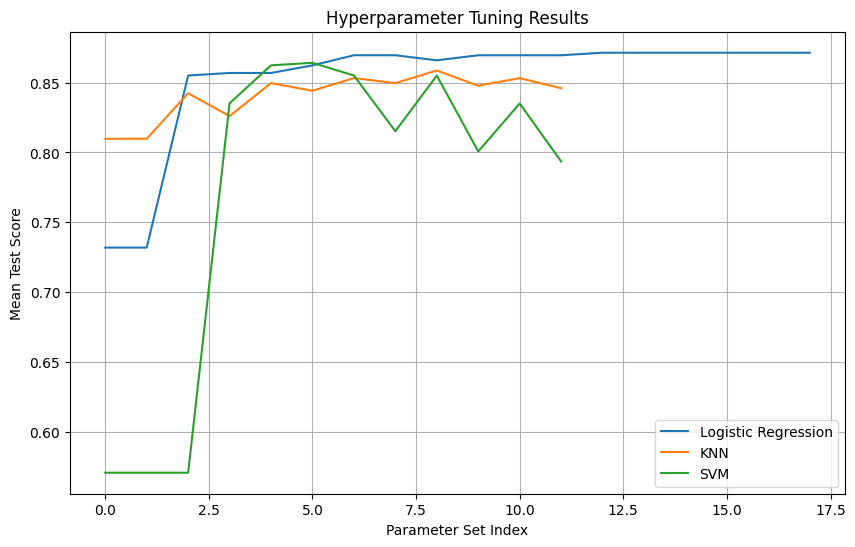

Best Model: Logistic Regression with Parameters: {'C': 10, 'solver': 'newton-cg'}


In [23]:
# Store results for plotting and evaluation
results = {}

# Perform hyperparameter tuning for each model using the scaled training set
for model_name, (model, param_grid) in models.items():
    grid_search = GridSearchCV(model, param_grid, scoring='accuracy', cv=5)
    grid_search.fit(X_train_scaled, y_train)  # Using scaled training data
    
    # Store the results
    results[model_name] = {
        'best_params': grid_search.best_params_,
        'best_score': grid_search.best_score_,
        'scores': grid_search.cv_results_['mean_test_score'],
        'model': grid_search.best_estimator_  # Store the best model for evaluation
    }
    
    print(f"Best {model_name} Parameters: {grid_search.best_params_}")
    print(f"Best {model_name} Score: {grid_search.best_score_}")

    # Print each parameter set and the corresponding score
    for i, score in enumerate(grid_search.cv_results_['mean_test_score']):
        print(f"Parameter Set {i}: {grid_search.cv_results_['params'][i]}, Score: {score:.4f}")

# Evaluate each model on the test set and visualize results
plt.figure(figsize=(10, 6))
for model_name, result in results.items():
    y_pred = result['model'].predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{model_name} Test Accuracy: {accuracy:.4f}")
    plt.plot(result['scores'], label=model_name)

plt.title('Hyperparameter Tuning Results')
plt.xlabel('Parameter Set Index')
plt.ylabel('Mean Test Score')
plt.legend()
plt.grid()
plt.show()

# Pick the best parameter set
best_model_name = max(results, key=lambda x: results[x]['best_score'])
best_params = results[best_model_name].get('best_params', 'No parameters found')
print(f"Best Model: {best_model_name} with Parameters: {best_params}")

from sklearn.model_selection import KFold



# Confusion Matrix

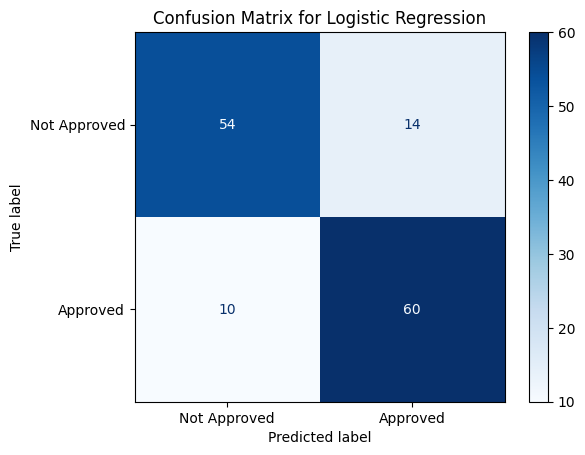

In [56]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Generate predictions for the best model
y_pred_best = results[best_model_name]['model'].predict(X_test_scaled)

# Create confusion matrix
cm = confusion_matrix(y_test, y_pred_best)

# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Not Approved', 'Approved'])
disp.plot(cmap=plt.cm.Blues)
plt.title(f'Confusion Matrix for {best_model_name}')
plt.show()


# Classification Report


In [32]:
# Display classification reports for each model
for model_name, result in results.items():
    y_pred = result['model'].predict(X_test_scaled)
    print(f"\nClassification Report for {model_name}:\n{classification_report(y_test, y_pred)}")


Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       0.84      0.79      0.82        68
           1       0.81      0.86      0.83        70

    accuracy                           0.83       138
   macro avg       0.83      0.83      0.83       138
weighted avg       0.83      0.83      0.83       138


Classification Report for KNN:
              precision    recall  f1-score   support

           0       0.83      0.85      0.84        68
           1       0.85      0.83      0.84        70

    accuracy                           0.84       138
   macro avg       0.84      0.84      0.84       138
weighted avg       0.84      0.84      0.84       138


Classification Report for SVM:
              precision    recall  f1-score   support

           0       0.83      0.76      0.79        68
           1       0.79      0.84      0.81        70

    accuracy                           0.80       138
   macro avg    

# ROC Curve and AUC

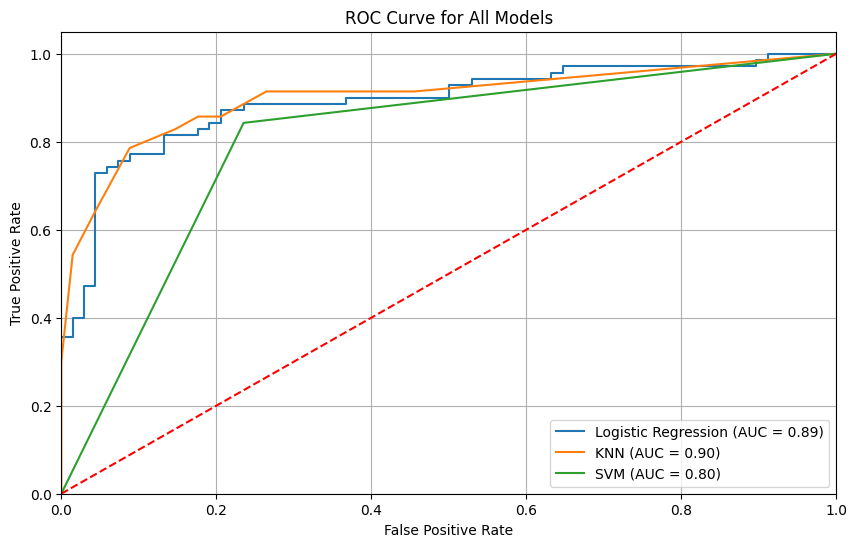

In [33]:
from sklearn.metrics import roc_curve, auc

plt.figure(figsize=(10, 6))

# Loop through all models to compute and plot ROC curves
for model_name, result in results.items():
    # Check if the model has predict_proba method
    if hasattr(result['model'], 'predict_proba'):
        y_pred_proba = result['model'].predict_proba(X_test_scaled)[:, 1]
    else:
        # If not, use predict method and convert to probabilities
        y_pred = result['model'].predict(X_test_scaled)
        y_pred_proba = (y_pred == 1).astype(int)  # Assuming binary classification

    # Compute ROC curve and AUC
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
    roc_auc = auc(fpr, tpr)
    
    # Plot ROC curve for each model
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for All Models')
plt.legend(loc='lower right')
plt.grid()
plt.show()


# Looks like the KNN model and the Logistic Regression model are the best models. They are very close in terms of accuracy, but the KNN model has a higher F1 score.

    Classification Report for KNN:
              precision    recall  f1-score   support

           0       0.83      0.85      0.84        68
           1       0.85      0.83      0.84        70
    accuracy                           0.84       138
    macro avg      0.84      0.84      0.84       138
    weighted avg   0.84      0.84      0.84       138

    Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       0.84      0.79      0.82        68
           1       0.81      0.86      0.83        70
    accuracy                           0.83       138
    macro avg      0.83      0.83      0.83       138
    weighted avg   0.83      0.83      0.83       138

    Classification Report for SVM:
              precision    recall  f1-score   support

           0       0.83      0.76      0.79        68
           1       0.79      0.84      0.81        70
    accuracy                           0.80       138
    macro avg      0.81      0.80      0.80       138
    weighted avg   0.81      0.80      0.80       138

# K-Fold Cross-Validation

In [53]:
# Set the number of splits for K-Fold cross-validation
K = 10
kf = KFold(n_splits=K, shuffle=True, random_state=42)

# Store cross-validation results
cv_results = {}

# Perform K-Fold cross-validation for each model
for model_name, (model, param_grid) in models.items():
    cv_scores = []
    
    for train_index, val_index in kf.split(X_train_scaled):
        X_train_cv, X_val_cv = X_train_scaled[train_index], X_train_scaled[val_index]
        
        # Ensure y_train is a pandas Series and use .iloc for positional indexing
        y_train_cv, y_val_cv = y_train.iloc[train_index], y_train.iloc[val_index]
        
        # Perform grid search on the training fold
        grid_search = GridSearchCV(model, param_grid, scoring='accuracy', cv=5)
        grid_search.fit(X_train_cv, y_train_cv)
        
        # Evaluate on the validation fold
        val_score = grid_search.score(X_val_cv, y_val_cv)
        cv_scores.append(val_score)
    
    # Store the mean and standard deviation of the cross-validation scores
    cv_results[model_name] = {
        'mean_cv_score': np.mean(cv_scores),
        'std_cv_score': np.std(cv_scores)
    }
    
    print(f"{model_name} - Mean CV Score: {cv_results[model_name]['mean_cv_score']:.4f}, Std CV Score: {cv_results[model_name]['std_cv_score']:.4f}")



Logistic Regression - Mean CV Score: 0.8660, Std CV Score: 0.0419
KNN - Mean CV Score: 0.8497, Std CV Score: 0.0359
SVM - Mean CV Score: 0.8534, Std CV Score: 0.0379


# Results:

 After evaluating the performance of the models, we can determine the best model based on the mean cross-validation scores, test accuracies, and classification reports.

 The models and their respective mean CV scores are as follows:
 - Logistic Regression: Mean CV Score: 0.8660, Test Accuracy: 0.8261
 - KNN: Mean CV Score: 0.8497, Test Accuracy: 0.8406
 - SVM: Mean CV Score: 0.8534, Test Accuracy: 0.8043
 
 Logistic Regression has the highest mean CV score of 0.8660, but its test accuracy is slightly lower than KNN's test accuracy of 0.8406. 
 However, Logistic Regression's performance is less consistent, as indicated by its higher standard deviation (0.0419) compared to KNN (0.0359) and SVM (0.0379).

 In terms of classification reports:
 - Logistic Regression shows a balanced precision and recall, with an f1-score of 0.83 for both classes.
 - KNN also performs well, with an f1-score of 0.84 for both classes.
 - SVM has the lowest f1-scores, indicating it may not generalize as well as the other models.
 
 Given these considerations, the winning model is KNN. 
 
 It not only has a higher mean CV score but also demonstrates a good balance between precision and recall, making it a reliable choice for this classification task, as well as  great ROC curve.


# To further improve the performance of the models:
1. Feature Engineering: Exploring additional features that could enhance model performance, such as player statistics, game conditions, or historical performance data.
2. Hyperparameter Tuning: Utilizing more advanced techniques for hyperparameter tuning to find optimal model settings.
3. Ensemble Methods: Combining multiple models (e.g., bagging, boosting) to leverage their strengths and improve overall accuracy.
4. Data Augmentation: Researching more on the dataset with synthetic data to improve model robustness and generalization.

# Business Insights:
- The analysis indicates that KNN is the most reliable model for predicting outcomes, which can help managers make informed decisions regarding player selections and game strategies.
- Understanding the model's performance metrics can guide resource allocation, such as focusing on training players in areas where the model indicates weaknesses.
- The insights derived from the model can also assist in risk management by predicting potential game outcomes and adjusting strategies accordingly.

# Ethical Concerns:
- Data Privacy: Ensuring that player data is handled in compliance with privacy regulations and that sensitive information is not disclosed without consent.
- Bias in Data: I was aware of potential biases in the dataset that could lead to unfair treatment of players or teams, particularly if certain demographics are underrepresented.
- Transparency: Maintaining transparency in how models are built and used, ensuring that stakeholders understand the limitations and potential biases of the predictions.
